## FUNDAMENTOS DE LA TÉCNICA **kNN**
Es un método de aprendizaje supervisado para tareas de clasificación y regresión, basado la similitud de etiquetas según la distancia entre ellas, es decir, sus vecinos más cercanos según un conjunto de características.
Dicho método es no parámetrico, es decir, el modelo se construye por medio de los datos.

## MODELO MATEMÁTICO
Sea $$D = \{(x_i, y_i)\}_{i=1}^n = \{(x_1, y_1), (x_2, y_2), \dots\}$$
un conjunto de entrenamiento.

Dado un punto $$x \in \mathbb{R}^d$$
se define su clase $$\hat{y}$$ cómo:$$\hat{y} = \text{modo}(\{y_i : x_i \in \mathcal{N}_k(x)\})$$

Donde
$$\mathcal{N}_k(x)$$
son los **k vecinos más cercanos** a x en el conjunto de entrenamiento.

La distancia más común para definir esto es la **Euclidiana**
$$d(x, x') = \sqrt{\sum_{j=1}^d (x_j - x_j')^2}$$

Dado un nuevo punto x que queremos clasificar, buscaremos sus k vecinos más cercanos con los datos del conjunto de entrenamiento.

$$\mathcal{N}_k(x)$$

cómo ya mencioné, representa el conjunto de vecinos.

Para cada vecino $$x_i \in \mathcal{N}_k(x)$$ obtenemos su etiqueta $$y_i$$

El conjunto $$\{y_i : x_i \in \mathcal{N}_k(x)\}$$ contiene todas las etiquetas de los vecinos.

La función modo(.) devuelve la clase con más apariciones en dicho conjunto.



## Descripción de la librería, clases, funciones en su respectiva sección


**Sklearn:** Es una biblioteca de python que es muy popular por su uso en la creación de modelos de lenguaje automático. Es de código abierto y gratuito para el análisis de datos y modelos predictivos. Proporciona herramientas para:

- Clasificación de datos.
- Regresión.
- Agrupamiento (Clustering).
- Preprocesamiento de datos.
- Selección de modelos.

**Numpy**: Es una librería fundamental para el cálculo númerico en python. Especialmente diseñada para trabajar con grandes volúmenes de datos cómo arrays y matrices multidimensionales.

**Seaborn:**

**Pandas:** Es una librería famosa de python que permite el manejo y manipulación de archivos csv.

## **PIPELINE**

### Descripción del problema.
Para usar el método kNN tenemos un dataset de arquetipos de personalidad, y según las estadísticas de cada registro, estos pertenecerán a la clase 0, 1 o 2. El objetivo es añadir un nuevo registro y que sea clasificado por el kNN según sus vecinos más cercanos en base al conjunto de datos de entrenamiento que le estaremos brindando por medio del dataset.

### Preprocesamiento

Cargamos el datset y le hacemos el análisis previo así como el dibujado del gráfico de dispersión.

Usamos **pandas** para cargar el dataset, y **matplotlib** con **Seaborn** para mapear los gráficos de dispersión.

El dataset tiene 200 filas y 5 columnas.
Columnas: ['Logica', 'Creatividad', 'Empatia', 'Organizacion', 'Arquetipo']
Estadísticas de las características:
           Logica  Creatividad     Empatia  Organizacion
count  200.000000   200.000000  200.000000    200.000000
mean     6.345500     6.139000    6.897500      6.422500
std      1.819128     1.924943    1.879844      1.484508
min      2.000000     2.200000    2.100000      2.300000
25%      5.000000     4.775000    5.400000      5.475000
50%      6.000000     6.100000    7.400000      6.650000
75%      7.925000     7.700000    8.300000      7.425000
max     10.000000    10.000000   10.000000      9.300000

Estadísticas individuales:
Promedio (avg):
Logica          6.3455
Creatividad     6.1390
Empatia         6.8975
Organizacion    6.4225
Name: mean, dtype: float64

Desviación Estándar (std):
Logica          1.819128
Creatividad     1.924943
Empatia         1.879844
Organizacion    1.484508
Name: std, dtype: float64

Valor Mínimo (m

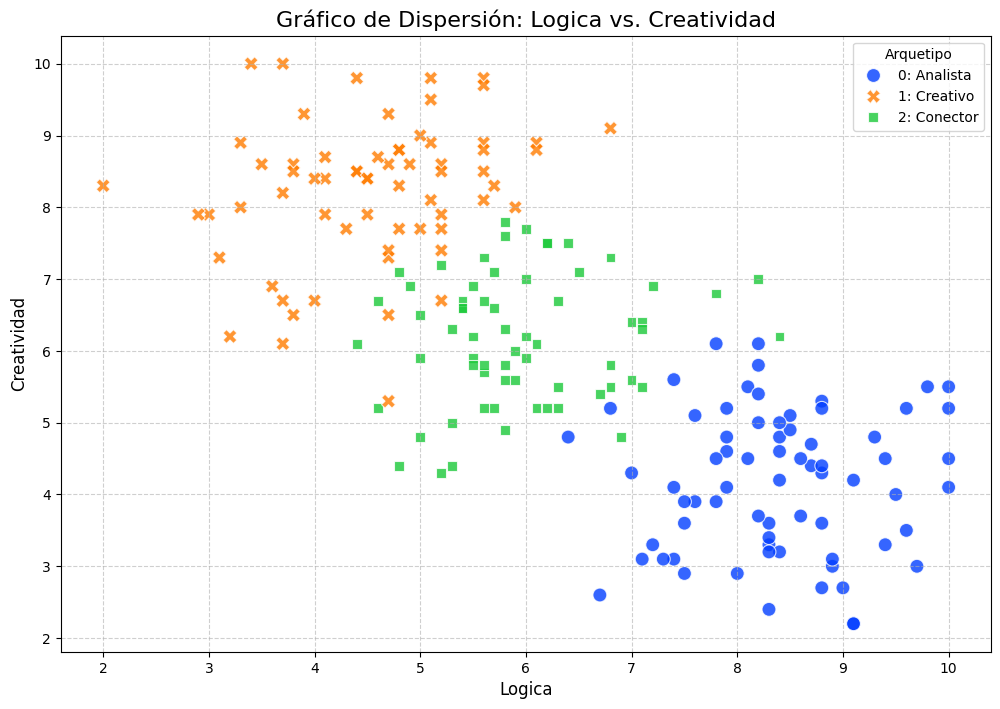

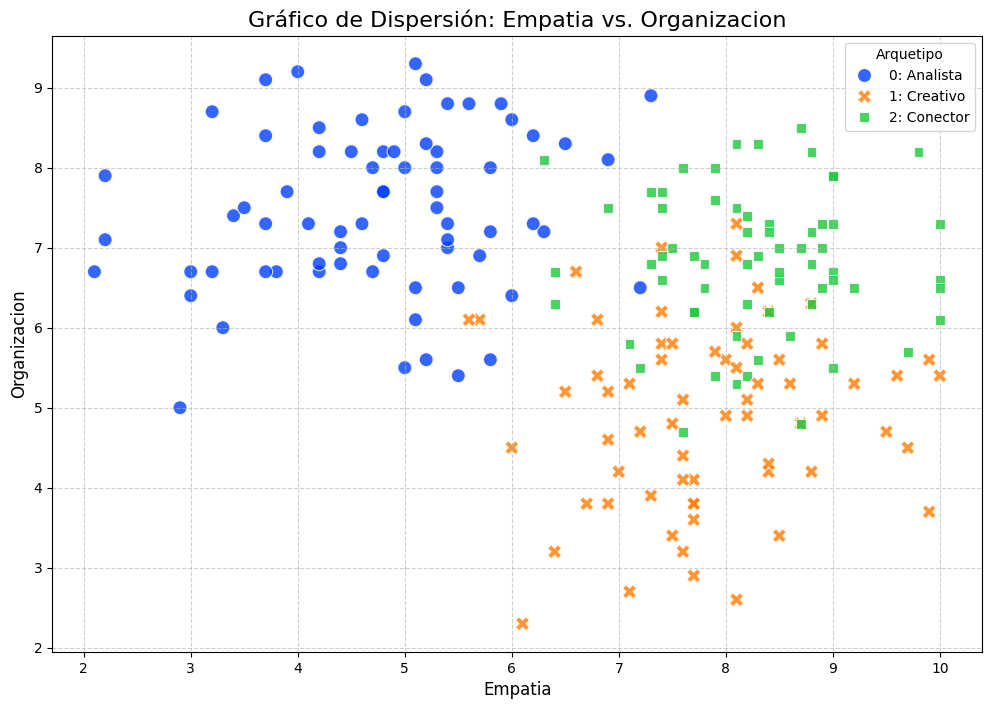

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class AnalisisEstadistico:

    def __init__(self, file_path):
        try:
            self.df = pd.read_csv(file_path)
            print(f"El dataset tiene {self.df.shape[0]} filas y {self.df.shape[1]} columnas.")
            print(f"Columnas: {self.df.columns.tolist()}")
        except FileNotFoundError:
            print(f"Error: No se encontró el archivo en {file_path}")
            self.df = None
        except Exception as e:
            print(f"Ocurrió un error al cargar el archivo: {e}")
            self.df = None

    def get_analisis_descriptivo(self):
        if self.df is not None:
            try:
                features_df = self.df.drop('Arquetipo', axis=1)
                descripcion = features_df.describe()

                print("Estadísticas de las características:")
                print(descripcion)

                print("\nEstadísticas individuales:")
                print(f"Promedio (avg):\n{descripcion.loc['mean']}\n")
                print(f"Desviación Estándar (std):\n{descripcion.loc['std']}\n")
                print(f"Valor Mínimo (min):\n{descripcion.loc['min']}\n")
                print(f"Valor Máximo (max):\n{descripcion.loc['max']}\n")

                return descripcion

            except KeyError:
                print("Error: La columna 'Arquetipo' no se encontró. Mostrando descripción de todo el DataFrame.")
                print(self.df.describe())
                return self.df.describe()
            except Exception as e:
                print(f"Ocurrió un error en el análisis: {e}")
                return None
        else:
            print("No hay datos cargados para analizar.")
            return None

    def crear_grafico_dispersion(self, x_col, y_col, color_col='Arquetipo'):
        if self.df is not None:

            if not all(col in self.df.columns for col in [x_col, y_col, color_col]):
                print(f"Error: Una o más columnas ({x_col}, {y_col}, {color_col}) no existen en el DataFrame.")
                return

            plt.figure(figsize=(12, 8))
            sns.scatterplot(
                data=self.df,
                x=x_col,
                y=y_col,
                hue=color_col,
                palette='bright',
                s=100,
                alpha=0.8,
                style=color_col,
                legend='full'
            )

            handles, labels = plt.gca().get_legend_handles_labels()
            nuevas_etiquetas = ['0: Analista', '1: Creativo', '2: Conector']
            mapa_etiquetas = {
                '0': '0: Analista',
                '1': '1: Creativo',
                '2': '2: Conector'
            }
            labels_actualizados = [mapa_etiquetas.get(lbl, lbl) for lbl in labels if lbl in mapa_etiquetas]
            handles_actualizados = [h for h, lbl in zip(handles, labels) if lbl in mapa_etiquetas]

            plt.title(f'Gráfico de Dispersión: {x_col} vs. {y_col}', fontsize=16)
            plt.xlabel(x_col, fontsize=12)
            plt.ylabel(y_col, fontsize=12)
            plt.legend(title='Arquetipo', handles=handles_actualizados, labels=labels_actualizados)
            plt.grid(True, linestyle='--', alpha=0.6)

        else:
            print("No hay datos cargados para graficar.")

file_path = 'arquetipos_200.csv'

analizador = AnalisisEstadistico(file_path)

if analizador.df is not None:
    analizador.get_analisis_descriptivo()

    # Gráfico 1: Logica vs Creatividad
    analizador.crear_grafico_dispersion(x_col='Logica', y_col='Creatividad')

    # Gráfico 2: Empatia vs Organizacion
    analizador.crear_grafico_dispersion(x_col='Empatia', y_col='Organizacion')

else:
    print("No se pudo ejecutar el análisis porque el DataFrame no se cargó.")

Se observa una clara diferenciación entre los tres arquetipos, con patrones bien definidos en sus puntuaciones. Cada grupo presenta concentraciones específicas en determinadas variables: los Analistas destacan por su alta Lógica y Organización, los Creativos por su elevada Creatividad y Empatía, y los Conectores muestran un equilibrio con valores altos en Empatía y Organización. Esta distribución permite distinguir visualmente cada arquetipo en los gráficos de dispersión, evidenciando un patrón coherente y bien estructurado.

### FEATURING ENGINEERING

**Problema**: Este es un problema de clasificación multiclase, por lo que en este caso predeciremos a que grupo de los ya análisados pertenecería un nuevo dato de entrada y lo clasificaría correctamente.

**Variables de entrada (X):** Las características que definen a la persona.
- Lógica.
- Creatividad.
- Empatía.
- Organización.


**Variables de salida (Y):** Nuestra clase a predecir.
- Arquetipo: Clase 0: Analista, Clase 1: Creativo, Clase 2: Conector.

**Variables a emplear en el modelo clasficador:**
- Para kNN, el objetivo es encontrar la 'cercanía' en un espacio N-dimensional. Por lo tanto, usaremos todas las características que creemos que son relevantes para definir el 'Arquetipo'.


En este caso usarmeos **sklearn** para diferentes funcionalidades, entre ellas el poder dividir los datos de entrenamiento y de prueba importanto **train_test_split**. StandarScaler para escalar los datos posteriormente a dividirlos y finalmente para cargar el modelo clasificador kNN con **KNeighborsClassifier** la cuál nos permitirá entrenar al modelo también.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = analizador.df.drop('Arquetipo', axis=1)
y = analizador.df['Arquetipo']
print("\nForma de X (características):", X.shape)
print("Forma de y (etiquetas):", y.shape)
print("\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_valor = 7
knn = KNeighborsClassifier(n_neighbors=k_valor)

knn.fit(X_train_scaled, y_train)


Forma de X (características): (200, 4)
Forma de y (etiquetas): (200,)


Datos divididos: 140 para entrenamiento, 60 para prueba.


KNeighborsClassifier(n_neighbors=7)

## PREDICTION

Usamos una función para mostrar donde el modelo clasificador hizo la predicción y a que clase asigno este nuevo patrón.

In [61]:
import numpy as np

ARQUETIPO_MAPA = {
    0: 'Analista',
    1: 'Creativo',
    2: 'Conector'
}
def predecir_nuevo_arquetipo(patron_entrada, modelo_knn, escalador, mapa_etiquetas):

    print(f"--- Clasificando nuevo patrón: {patron_entrada} ---")

    if len(patron_entrada) != escalador.n_features_in_:
        print(f"Error: El patrón debe tener {escalador.n_features_in_} características.")
        return
    patron_formateado = np.array(patron_entrada).reshape(1, -1)

    patron_escalado = escalador.transform(patron_formateado)

    prediccion_num = modelo_knn.predict(patron_escalado)

    clase_predicha_num = prediccion_num[0]
    clase_predicha_nombre = mapa_etiquetas.get(clase_predicha_num, "Clase Desconocida")

    print(f"Predicción del Modelo: Es un '{clase_predicha_nombre}' (Clase {clase_predicha_num})")
    print("-" * (30 + len(patron_entrada)))

print("\n\n--- Pruebas de Predicción Individual ---")

nuevo_analista = [9.0, 3.1, 4.0, 8.5]
predecir_nuevo_arquetipo(nuevo_analista, knn, scaler, ARQUETIPO_MAPA)

nuevo_creativo = [3.5, 9.5, 8.0, 2.9]
predecir_nuevo_arquetipo(nuevo_creativo, knn, scaler, ARQUETIPO_MAPA)

nuevo_conector = [5.5, 6.0, 9.2, 8.8]
predecir_nuevo_arquetipo(nuevo_conector, knn, scaler, ARQUETIPO_MAPA)

perfil_mixto = [7.0, 7.0, 7.0, 7.0]
predecir_nuevo_arquetipo(perfil_mixto, knn, scaler, ARQUETIPO_MAPA)

y_pred = knn.predict(X_test_scaled) #Predicción para calcular el accuracy



--- Pruebas de Predicción Individual ---
--- Clasificando nuevo patrón: [9.0, 3.1, 4.0, 8.5] ---
Predicción del Modelo: Es un 'Analista' (Clase 0)
----------------------------------
--- Clasificando nuevo patrón: [3.5, 9.5, 8.0, 2.9] ---
Predicción del Modelo: Es un 'Creativo' (Clase 1)
----------------------------------
--- Clasificando nuevo patrón: [5.5, 6.0, 9.2, 8.8] ---
Predicción del Modelo: Es un 'Conector' (Clase 2)
----------------------------------
--- Clasificando nuevo patrón: [7.0, 7.0, 7.0, 7.0] ---
Predicción del Modelo: Es un 'Conector' (Clase 2)
----------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### MODEL EVALUATION

Aquí usamos las importaciones accuracy_Score y confusion_matrix para evaluar al modelo clasificador, en este caso podemos observar que un 91.67% de accuracy significa que el modelo acertó aproximadamente 91 de cada 100 casos. Y la matriz de confusión muestra cómo hubo ciertos errores al clasificar, pero en la mayoría de casos pudo hacerlo correctamente.

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

labels = [ARQUETIPO_MAPA[i] for i in sorted(ARQUETIPO_MAPA.keys())]

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy del modelo: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión (Datos Crudos):")
print(cm)


Accuracy del modelo: 91.67%
Matriz de Confusión (Datos Crudos):
[[21  0  0]
 [ 0 15  5]
 [ 0  0 19]]


## CONCLUSIONES

Se puede concluir que la relación entre los tres arquetipos de personalidad son consistentes y son coincidente con las gráficas de dispersión previamente hechas. Los datos muestran que el modelo identifica con gran facilidad a los Analistas y Conectores, mientras que en los Creativos existe un poco más de confusión con la clase Conector, lo cual es normal porque ambos comparten valores similares en algunas variables. En general, el modelo es fiable, generaliza bien y no está sobreajustado, mostrando un desempeño balanceado.

## REFERENCIAS

- Díaz, R. (2024, 6 julio). Algoritmo KNN – cómo funciona y ejemplos en Python. The Machine Learners. https://www.themachinelearners.com/algoritmo-knn
- DataCamp. (2024, 3 de mayo). K-Nearest Neighbors (KNN) clasificación con R: Tutorial. https://www.datacamp.com/es/tutorial/k-nearest-neighbors-knn-classification-with-r-tutorial
- Na, & Na. (2024b, octubre 30). Algoritmo K-Nearest Neighbor | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python
- Avina Mendez, J. A. (n.d.). Perceptron [Presentación].
- Google. (n.d.). Gemini.